In [7]:
# !pip install --upgrade keras


In [2]:
import cv2,os
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
from sklearn.model_selection import train_test_split

import cv2
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import tensorflow as tf
import keras


In [3]:

data_path='/content/drive/MyDrive/Colab Notebooks/DATASET'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'test': 0, 'train': 1}
['test', 'train']
[0, 1]


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = "/content/drive/MyDrive/Colab Notebooks/DATASET/train"
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['W', 'T', 'R', 'Y', 'S', 'U', 'X', 'V', 'Q', 'Z', 'H', 'L', 'J', 'K', 'N', 'O', 'P', 'I', 'G', 'M', 'E', 'D', '0', 'C', 'B', 'F', 'A']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [5]:
data_path='/content/drive/MyDrive/Colab Notebooks/DATASET'


In [6]:
label_classes_dict=dict(zip(classesf,labels_classes))

In [7]:
#print(labels_classes)
#print(categories)
print(label_classes_dict)

{'W': 0, 'T': 1, 'R': 2, 'Y': 3, 'S': 4, 'U': 5, 'X': 6, 'V': 7, 'Q': 8, 'Z': 9, 'H': 10, 'L': 11, 'J': 12, 'K': 13, 'N': 14, 'O': 15, 'P': 16, 'I': 17, 'G': 18, 'M': 19, 'E': 20, 'D': 21, '0': 22, 'C': 23, 'B': 24, 'F': 25, 'A': 26}


In [8]:
img_size=128
data=[]
target=[]
c=0
minValue = 70
for category in categories:

    cat_path=os.path.join(data_path,category)
    print(cat_path)
    cat_names=os.listdir(cat_path)
    print(cat_names)
    for classes in cat_names:
        folder_path=os.path.join(data_path,category,classes)
        print(folder_path)
        img_names=os.listdir(folder_path)
        #print(img_names)
        for img_name in img_names:
            #print(img_name)
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)

            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                blur = cv2.GaussianBlur(gray,(5,5),2)
                th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                #res=np.array(res)
                #print(type(res))
            #Converting the image into gray scale
                resized=cv2.resize(res,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                #print(data)
                target.append(label_classes_dict[classes])
            except Exception as e:
                print('Exception:',e)





/content/drive/MyDrive/Colab Notebooks/DATASET/test
['Z', 'Y', 'X', 'W', 'T', 'Q', 'P', 'R', 'S', 'N', 'U', 'V', 'O', 'J', 'L', 'F', 'G', 'M', 'D', 'E', 'K', 'I', 'H', '0', 'C', 'B', 'A']
/content/drive/MyDrive/Colab Notebooks/DATASET/test/Z
/content/drive/MyDrive/Colab Notebooks/DATASET/test/Y
/content/drive/MyDrive/Colab Notebooks/DATASET/test/X
/content/drive/MyDrive/Colab Notebooks/DATASET/test/W
/content/drive/MyDrive/Colab Notebooks/DATASET/test/T
/content/drive/MyDrive/Colab Notebooks/DATASET/test/Q
/content/drive/MyDrive/Colab Notebooks/DATASET/test/P
/content/drive/MyDrive/Colab Notebooks/DATASET/test/R
/content/drive/MyDrive/Colab Notebooks/DATASET/test/S
/content/drive/MyDrive/Colab Notebooks/DATASET/test/N
/content/drive/MyDrive/Colab Notebooks/DATASET/test/U
/content/drive/MyDrive/Colab Notebooks/DATASET/test/V
/content/drive/MyDrive/Colab Notebooks/DATASET/test/O
/content/drive/MyDrive/Colab Notebooks/DATASET/test/J
/content/drive/MyDrive/Colab Notebooks/DATASET/test/L
/c

In [9]:
datanp=np.array(data)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
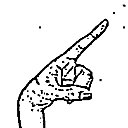

In [10]:
datanp.shape
datanp[0]

In [11]:
targetnp=np.array(target)

targetnp.shape

targetnp[0]

9

In [12]:

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
new_target = to_categorical(target)


In [13]:
new_target.shape

(17113, 27)

In [14]:
np.save('data_img',data)
np.save('target',new_target)

In [15]:
data=np.load('data_img.npy')
target=np.load('target.npy')

In [16]:
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [19]:

sz = 128
# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu',padding='same'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')


history=classifier.fit(train_data,train_target,shuffle=True,epochs=20,callbacks=[checkpoint],validation_split=0.3)

Epoch 1/20
300/300 [==============================] - 247s 820ms/step - loss: 2.1046 - accuracy: 0.3634 - val_loss: 0.3696 - val_accuracy: 0.9235
Epoch 2/20
149/300 [=============>................] - ETA: 1:47 - loss: 0.7599 - accuracy: 0.7529

In [ ]:
print(classifier.evaluate(test_data,test_target))
classifier.save('CNNmodel.h5')
weights_file = drive.CreateFile({'title' : 'CNNmodel.h5'})
weights_file.SetContentFile('CNNmodel.h5')<br>weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

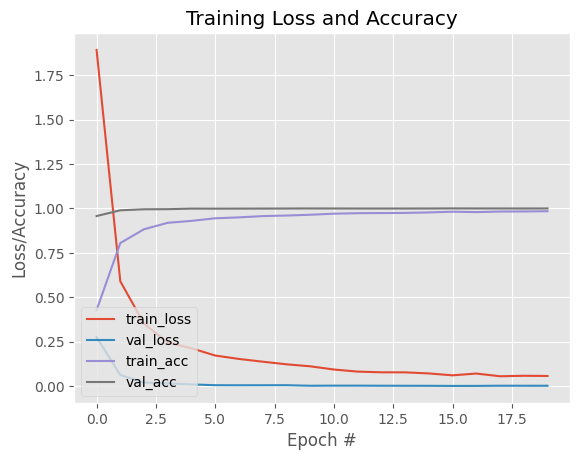

In [35]:
N = 20
H=history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

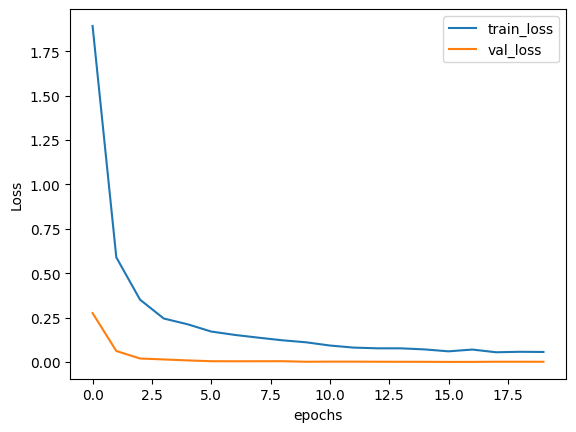

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

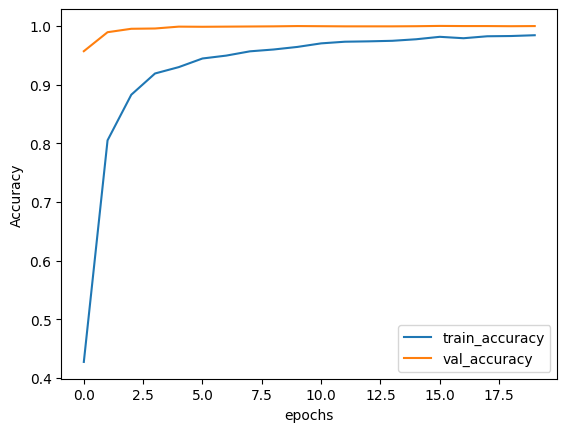

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()

# **OPEN-CV**

In [44]:
labels_dict = {0:'0',
                 1:'A',
                 2:'B',
                 3:'C',
                 4:'D',
                 5:'E',
                 6:'F',
                 7:'G',
                 8:'H',
                 9:'I',
                 10:'J',
                 11:'K',
                 12:'L',
                 13:'M',
                 14:'N',
                 15:'O',
                 16:'P',
                 17:"Q",
                 18:'R',
                 19:'S',
                 20:'T',
                 21:'U',
                 22:'V',
                 23:'W',
                 24:'X',
                 25:'Y',
                 26:'Z'}
color_dict=(0,255,0)
x=0
y=0
w=64
h=64

In [45]:
!pip install opencv-python-headless


In [ ]:
from google.colab import output

def enable_camera():
    output.eval_js('''
    async function enableCamera() {
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      const video = document.createElement('video');
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();
    }
    enableCamera();
    ''')

# Ensure that the user has granted permission to the website to access the webcam.
# If the user has not granted permission, the following line will raise an error.
enable_camera()

# If the code reaches this point, the user has granted permission to the website to access the webcam.

In [50]:
import cv2
import numpy as np

img_size = 128
minValue = 70
source = cv2.VideoCapture(0)
count = 0
string = " "
prev = " "
prev_val = 0

while True:
    ret,img = source.read()

    if not ret:  # Check if frame is captured successfully
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.rectangle(img, (24, 24), (250, 250), (255, 0, 0), 2)  # Assuming color_dict is defined somewhere else

    crop_img = gray[24:250, 24:250]
    count = count + 1

    if count % 100 == 0:
        prev_val = count

    cv2.putText(img, str(prev_val // 100), (300, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2)

    blur = cv2.GaussianBlur(crop_img, (5, 5), 2)
    th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    resized = cv2.resize(res, (img_size, img_size))
    normalized = resized / 255.0
    reshaped = np.reshape(normalized, (1, img_size, img_size, 1))
    result = model.predict(reshaped)  # Assuming model is defined somewhere else

    label = np.argmax(result, axis=1)[0]

    if count == 300:
        count = 99
        prev = labels_dict[label] if label != 0 else " "
        string = string + prev if label != 0 else string + " "

    cv2.putText(img, prev, (24, 14), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    cv2.putText(img, string, (275, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (200, 200, 200), 2)

    cv2.imshow("Gray", res)
    cv2.imshow('LIVE', img)

    key = cv2.waitKey(1)

    if key == 27:  # Press Esc. to exit
        break

print(string)
cv2.destroyAllWindows()
source.release()


KeyboardInterrupt: 